<a href="https://colab.research.google.com/github/Pushpit07/Cancer_Prediction_using_SVM/blob/main/Non_linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [23]:
X, Y = make_circles(n_samples=500,noise=0.02)

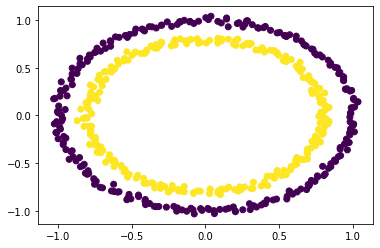

In [24]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [25]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0], 3))
    print(X_.shape)
    
    X_[:, :-1] = X
    X_[:, -1] = X3

    return X_

In [26]:
X_ = phi(X)

(500, 3)


In [27]:
def plot3d(X, show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]
    
    ax.scatter(X1, X2, X3, zdir='z', s=20, c=Y, depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

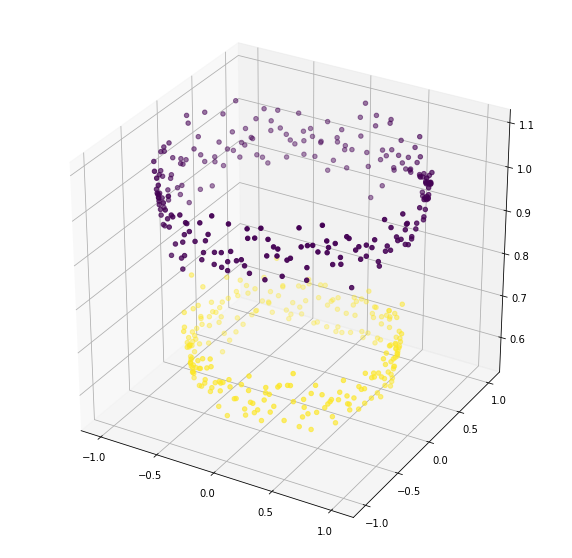

In [28]:
ax = plot3d(X_)

# Logistic Classifier

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [30]:
lr = LogisticRegression()

In [31]:
acc = cross_val_score(lr, X, Y, cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 45.2000


# Logistic Classifier on Higher Dimension Space

In [32]:
acc = cross_val_score(lr, X_, Y, cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


# Visualise the Decision Surface

In [33]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
wts = lr.coef_
print(wts)

[[  0.04927604  -0.02181283 -10.87516006]]


In [35]:
bias = lr.intercept_

In [36]:
xx, yy = np.meshgrid(range(-2,2), range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [37]:
z = -(wts[0,0]*xx + wts[0,1]*yy + bias) / wts[0,2]
print(z)

[[0.81606035 0.82059141 0.82512248 0.82965354]
 [0.8140546  0.81858566 0.82311673 0.82764779]
 [0.81204885 0.81657992 0.82111098 0.82564204]
 [0.8100431  0.81457417 0.81910523 0.82363629]]


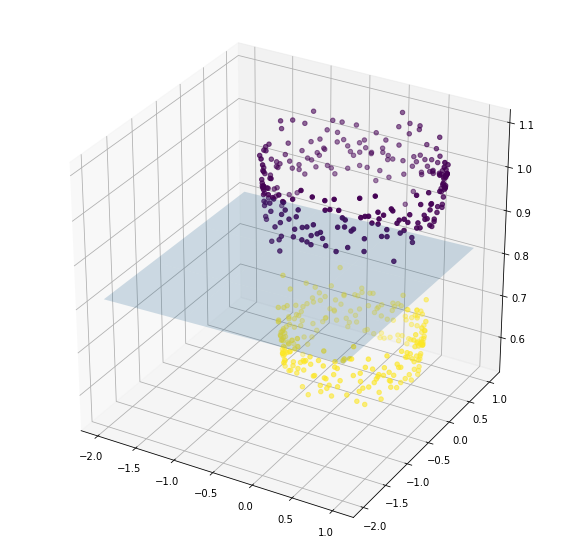

In [38]:
ax = plot3d(X_, False)
ax.plot_surface(xx, yy, z, alpha=0.2)
plt.show()